In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy.stats.stats import spearmanr
import seaborn as sn
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

col = ["wc","uwc","ewc","cpc", "hc","sc","ac","fc"]
datasets = ["emotion", "norm_emotion", "tweet", "norm_tweet"]
features = {
    "full": ["wc","uwc","ewc","cpc", "hc","sc","ac","fc", "a"],
    "nolex": ["wc","uwc","ewc","cpc", "a"],
    "lex": ["hc","sc","ac","fc", "a"]
}

fe = ["wc","uwc","ewc","cpc", "hc","sc","ac","fc"]

norm_tweet(wc) SpearmanrResult(correlation=0.03573343735315229, pvalue=0.006037633085478077)
norm_tweet(uwc) SpearmanrResult(correlation=0.016861234749798604, pvalue=0.19522263269059395)
norm_tweet(ewc) SpearmanrResult(correlation=-0.1560117970278675, pvalue=1.7621576710703656e-33)
norm_tweet(cpc) SpearmanrResult(correlation=-0.030719299940379797, pvalue=0.01826256520932479)
norm_tweet(hc) SpearmanrResult(correlation=-0.15142093393809847, pvalue=1.291630896306945e-31)
norm_tweet(sc) SpearmanrResult(correlation=0.17221477738688445, pvalue=1.5842245887756556e-40)
norm_tweet(ac) SpearmanrResult(correlation=0.31724196140606137, pvalue=3.907487252214957e-138)
norm_tweet(fc) SpearmanrResult(correlation=0.2685631867423567, pvalue=4.597543974456956e-98)


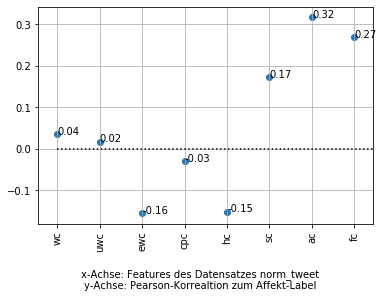

norm_emotion(wc) SpearmanrResult(correlation=0.12089655902959572, pvalue=0.0)
norm_emotion(uwc) SpearmanrResult(correlation=nan, pvalue=nan)
norm_emotion(ewc) SpearmanrResult(correlation=-0.02837711588644216, pvalue=1.1084048469598985e-33)
norm_emotion(cpc) SpearmanrResult(correlation=0.0019220811539334616, pvalue=0.41270524743318504)
norm_emotion(hc) SpearmanrResult(correlation=-0.31279290485260935, pvalue=0.0)
norm_emotion(sc) SpearmanrResult(correlation=0.10642590784465979, pvalue=0.0)
norm_emotion(ac) SpearmanrResult(correlation=0.28579740500037804, pvalue=0.0)
norm_emotion(fc) SpearmanrResult(correlation=0.22354699640491216, pvalue=0.0)


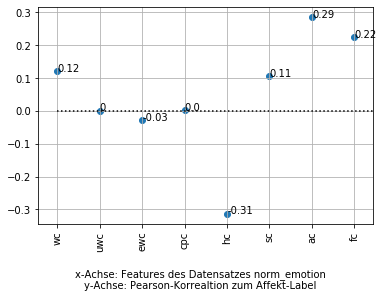

In [3]:

for dataset_name in ["norm_tweet", "norm_emotion"]:
    a = []
    dataset = pd.read_csv("../cleaned/" + dataset_name + "_clean.csv").fillna(0)
    targets = dataset["a"].tolist()
    for f in fe: 
        inputs = dataset[f]
        print("{}({})".format(dataset_name, f), spearmanr(inputs, targets))
        a.append(spearmanr(inputs, targets)[0])
    
    for i,e in enumerate(a):
        if np.isnan(e):
            a[i] = 0
    fig, ax = plt.subplots()
    desc = "x-Achse: Features des Datensatzes " + dataset_name + "\ny-Achse: Pearson-Korrealtion zum Affekt-Label"
    fig.text(0.5, -0.1, desc, ha='center')
    plt.xticks(range(0, len(fe)), fe, rotation=90)
    plt.hlines(0, 0, len(fe), linestyle="dotted")
    #plt.legend()#loc=1
    plt.grid()
    ax.scatter(fe, a)
    for i, txt in enumerate(a):
        #print(i, txt, fe[i], a[i])
        
        ax.annotate(str(round(txt,2)), (fe[i], a[i]))
    plt.show()
    fig.savefig("../img/corr_" + dataset_name + "_" + ".png", bbox_inches="tight")
    


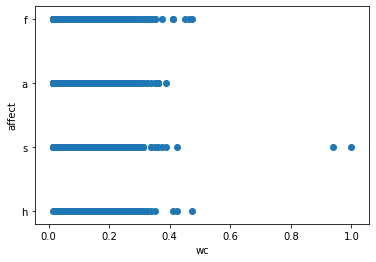

saving  ../img/scatter_norm_tweet_wc.png


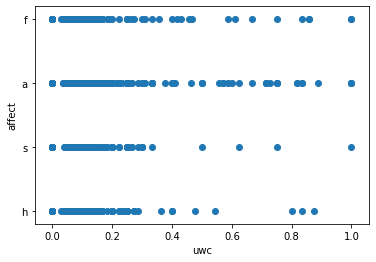

saving  ../img/scatter_norm_tweet_uwc.png


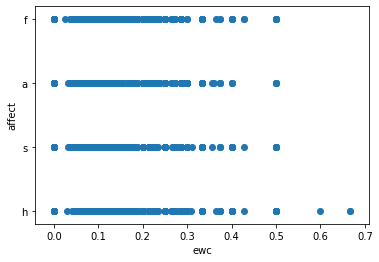

saving  ../img/scatter_norm_tweet_ewc.png


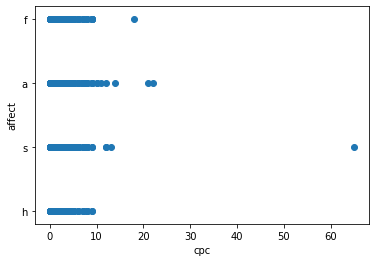

saving  ../img/scatter_norm_tweet_cpc.png


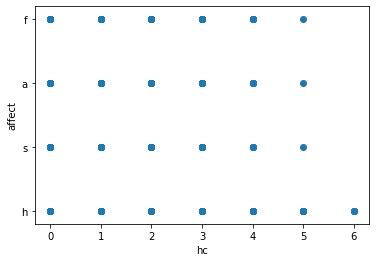

saving  ../img/scatter_norm_tweet_hc.png


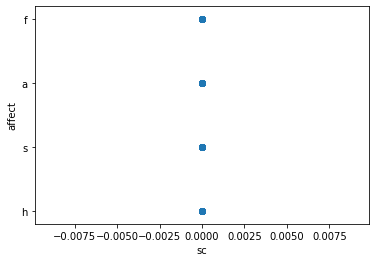

saving  ../img/scatter_norm_tweet_sc.png


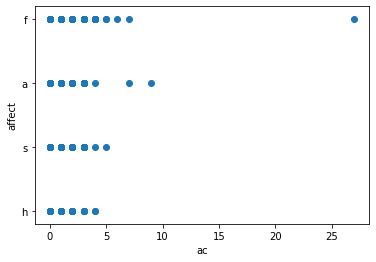

saving  ../img/scatter_norm_tweet_ac.png


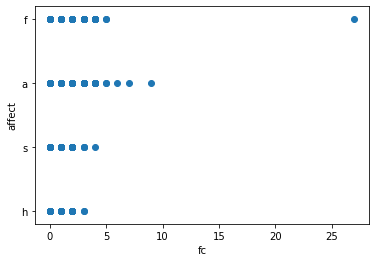

saving  ../img/scatter_norm_tweet_fc.png


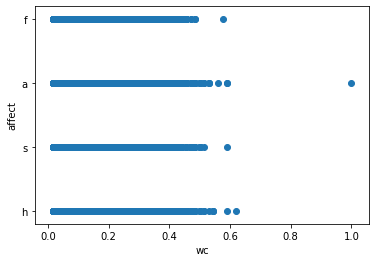

saving  ../img/scatter_norm_emotion_wc.png


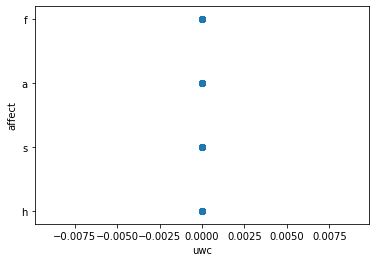

saving  ../img/scatter_norm_emotion_uwc.png


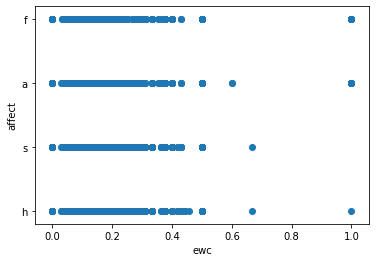

saving  ../img/scatter_norm_emotion_ewc.png


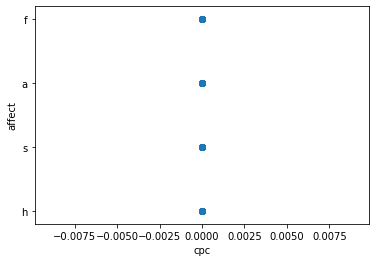

saving  ../img/scatter_norm_emotion_cpc.png


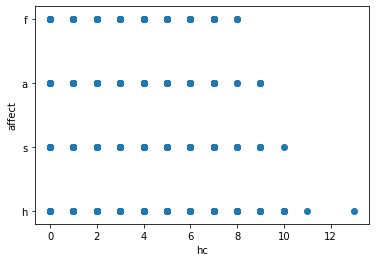

saving  ../img/scatter_norm_emotion_hc.png


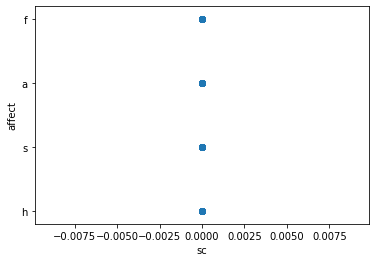

saving  ../img/scatter_norm_emotion_sc.png


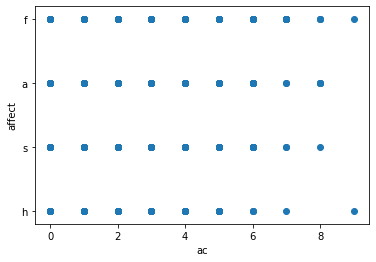

saving  ../img/scatter_norm_emotion_ac.png


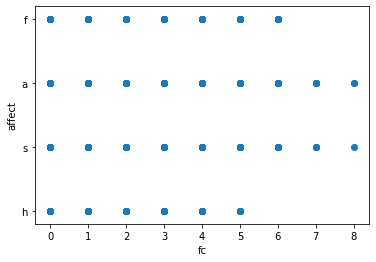

saving  ../img/scatter_norm_emotion_fc.png


In [121]:
# make simple scatterplots
  for dataset_name in ["norm_tweet", "norm_emotion"]: 
    for c in col: 
        dataset = pd.read_csv("../cleaned/" + dataset_name + "_clean.csv")
        fig = plt.figure()
        ax = plt.subplot()
        plt.clf()
        plt.ylabel("affect")
        plt.yticks([0, 1, 2, 3], labels=["h", "s", "a", "f"])
        plt.xlabel(c)
        ax = plt.scatter(dataset[c].tolist(), dataset["a"].tolist())
        plt.show()
        print("saving ", "../img/scatter_" + dataset_name + "_" + c + ".png")
        fig.savefig("../img/scatter_" + dataset_name + "_" + c + ".png", bbox_inches="tight")